In [1]:
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,auc
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

2022-10-10 16:51:52.022723: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# load file
filepath = "../Data/creditcard.csv"
df = pd.read_csv(filepath)

In [3]:
# identify X features, and y class
# Those data have been used froom creditCard notbook, EDA
X = df.drop(['Class','Time','Amount'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 43)

In [4]:
# remove large amount transactions, which could be outliers
temp = df['Amount']>1000
fraud = df[df['Class'] ==1]
fraud[temp]

/var/folders/0z/5dyhp7xx5g700b6sqbzkl_fw0000gn/T/ipykernel_97568/140339194.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fraud[temp]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6971,9064.0,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,...,-1.052368,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1809.68,1
10690,18088.0,-12.224021,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,...,-1.159830,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,1218.89,1
81609,59011.0,-2.326922,-3.348439,-3.513408,3.175060,-2.815137,-0.203363,-0.892144,0.333226,-0.802005,...,1.226648,-0.695902,-1.478490,-0.061553,0.236155,0.531911,0.302324,0.536375,1389.56,1
89190,62467.0,-5.344665,-0.285760,-3.835616,5.337048,-7.609909,3.874668,1.289630,0.201742,-3.003532,...,0.276011,1.342045,-1.016579,-0.071361,-0.335869,0.441044,1.520613,-1.115937,1402.16,1
95597,65385.0,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,-1.016592,...,-0.511657,-0.122724,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,1354.25,1
176049,122608.0,-2.003460,-7.159042,-4.050976,1.309580,-2.058102,-0.098621,2.880083,-0.727484,1.460381,...,1.244287,-1.015232,-1.800985,0.657586,-0.435617,-0.894509,-0.397557,0.314262,2125.87,1
199896,133184.0,-1.212682,-2.484824,-6.397186,3.670562,-0.863375,-1.855855,1.017732,-0.544704,-1.703378,...,1.396872,0.092073,-1.492882,-0.204227,0.532511,-0.293871,0.212663,0.431095,1335.00,1
249167,154278.0,-1.600211,-3.488130,-6.459303,3.246816,-1.614608,-1.260375,0.288223,-0.048964,-0.734975,...,1.191175,-0.967141,-1.463421,-0.624231,-0.176462,0.400348,0.152947,0.477775,1504.93,1
249239,154309.0,-0.082983,-3.935919,-2.616709,0.163310,-1.400952,-0.809419,1.501580,-0.471000,1.519743,...,0.702672,-0.182305,-0.921017,0.111635,-0.071622,-1.125881,-0.170947,0.126221,1096.99,1


In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Normalize data, scale to [0,1]
#train_data = StandardScaler().fit_transform(X_train)
#test_data = StandardScaler().fit_transform(X_test)
train_data = MinMaxScaler().fit_transform(X_train)
test_data = MinMaxScaler().fit_transform(X_test)
train_labels = y_train
test_labels = y_test

In [7]:
train_data[6972]

array([0.97703082, 0.76537898, 0.94551042, 0.31116781, 0.75789933,
       0.26270575, 0.26064373, 0.79235622, 0.59804751, 0.61633761,
       0.33386554, 0.71868941, 0.31737106, 0.65168132, 0.30930115,
       0.45856449, 0.7224205 , 0.69197102, 0.56438072, 0.57769705,
       0.56118224, 0.51224776, 0.6659031 , 0.44986968, 0.59502982,
       0.34715266, 0.23891812, 0.31365183])

In [8]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

In [9]:
# Auto encoder with keras dense layers
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(64, activation="relu"),
     
      layers.Dropout(0.2),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      
      layers.Dropout(0.2),
      layers.Dense(64, activation="relu"),
      layers.Dense(28, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

2022-10-10 16:52:00.472594: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# second method to keras sequential model build
encoder = tf.keras.models.Sequential([tf.keras.layers.Reshape(([28,1,1]),input_shape=[28]),
    layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='tanh'),
    layers.Dropout(0.1),
      layers.Dense(32, activation="tanh"),
    
      layers.Dense(16, activation="tanh"),
      layers.Dense(8, activation="tanh")])

decoder = tf.keras.models.Sequential([
      layers.Dense(16, activation="tanh"),
      
      layers.Dense(32, activation="tanh"),
      layers.Dropout(0.1),
      layers.Conv2DTranspose(32,kernel_size=(3,3), padding='same', activation='tanh'),
      layers.Dense(1, activation="sigmoid"),
      tf.keras.layers.Reshape([1,28])])

autoencoder2 = tf.keras.models.Sequential([encoder,decoder])

In [11]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
autoencoder.compile(loss='binary_crossentropy', optimizer=opt)
autoencoder2.compile(loss='binary_crossentropy', optimizer=opt)

In [12]:
# train the data
from gc import callbacks


log_dir = "logs/fit1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=30, 
          batch_size=52,
          validation_data=(normal_test_data, normal_test_data),
          shuffle=True, callbacks=[tensorboard_callback])

Epoch 1/30
7/7 [==============================] - 1s 77ms/step - loss: 0.6766 - val_loss: 0.6910
Epoch 2/30
7/7 [==============================] - 0s 24ms/step - loss: 0.6405 - val_loss: 0.6945
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6324 - val_loss: 0.6928
Epoch 4/30
7/7 [==============================] - 0s 30ms/step - loss: 0.6309 - val_loss: 0.6927
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.6292 - val_loss: 0.6897
Epoch 6/30
7/7 [==============================] - 0s 29ms/step - loss: 0.6283 - val_loss: 0.6924
Epoch 7/30
7/7 [==============================] - 0s 42ms/step - loss: 0.6281 - val_loss: 0.6923
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6278 - val_loss: 0.6913
Epoch 9/30
7/7 [==============================] - 0s 28ms/step - loss: 0.6275 - val_loss: 0.6942
Epoch 10/30
7/7 [==============================] - 0s 29ms/step - loss: 0.6273 - val_loss: 0.6925
Epoch 11/30
7/7 [============

Dense layer training result


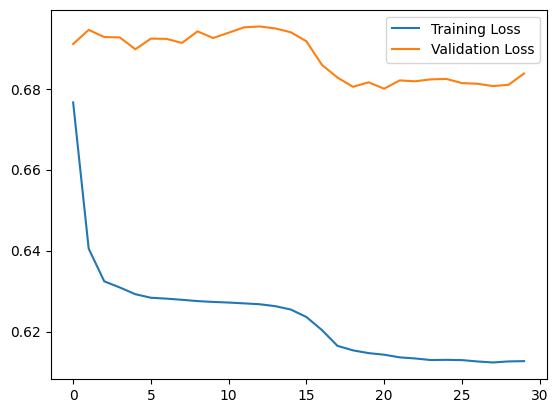

In [13]:
print('Dense layer training result')
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [14]:
log_dir2 = "logs/fit2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback2 = tf.keras.callbacks.TensorBoard(log_dir=log_dir2, histogram_freq=1)
history2 = autoencoder2.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=52,
          validation_data=(normal_test_data, normal_test_data),
          shuffle=True, callbacks=[tensorboard_callback2])

Epoch 1/20
7/7 [==============================] - 2s 119ms/step - loss: 0.7070 - val_loss: 0.7206
Epoch 2/20
7/7 [==============================] - 0s 44ms/step - loss: 0.6823 - val_loss: 0.6806
Epoch 3/20
7/7 [==============================] - 0s 53ms/step - loss: 0.6608 - val_loss: 0.6874
Epoch 4/20
7/7 [==============================] - 0s 51ms/step - loss: 0.6531 - val_loss: 0.6779
Epoch 5/20
7/7 [==============================] - 0s 40ms/step - loss: 0.6479 - val_loss: 0.6765
Epoch 6/20
7/7 [==============================] - 0s 48ms/step - loss: 0.6461 - val_loss: 0.6820
Epoch 7/20
7/7 [==============================] - 0s 47ms/step - loss: 0.6452 - val_loss: 0.6778
Epoch 8/20
7/7 [==============================] - 0s 52ms/step - loss: 0.6444 - val_loss: 0.6785
Epoch 9/20
7/7 [==============================] - 0s 51ms/step - loss: 0.6443 - val_loss: 0.6792
Epoch 10/20
7/7 [==============================] - 0s 38ms/step - loss: 0.6441 - val_loss: 0.6777
Epoch 11/20
7/7 [===========

Conv2D layer training result


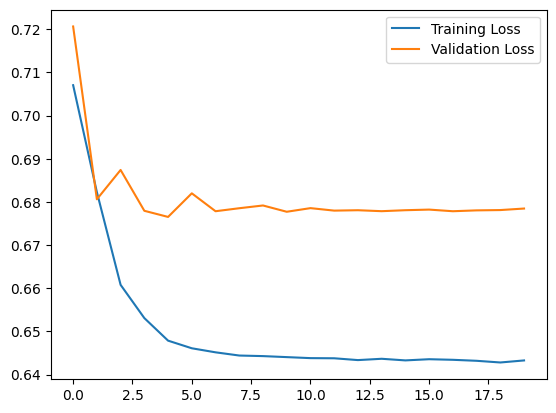

In [15]:


print('Conv2D layer training result')
plt.plot(history2.history["loss"], label="Training Loss")
plt.plot(history2.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

11/11 [==============================] - 0s 2ms/step


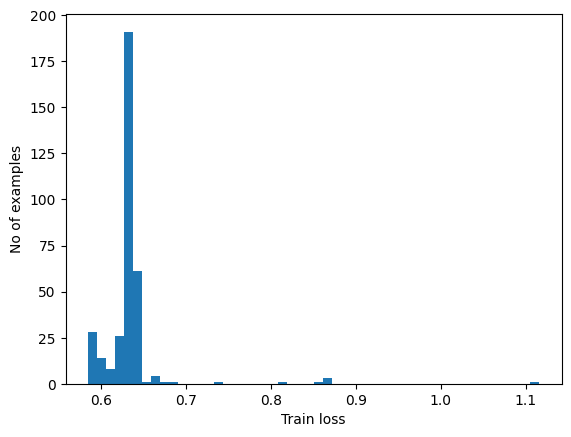

In [16]:
# plot the reconstuct error vs normal 
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.binary_crossentropy(reconstructions, normal_train_data)


plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [17]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)



Threshold:  0.6751091749049457


In [18]:
reconstructions2 = autoencoder2.predict(train_data)
#train_loss2 = tf.keras.losses.binary_crossentropy(reconstructions2, normal_train_data)
#threshold2 = np.mean(train_loss2) + np.std(train_loss2)
#print("Threshold: ", threshold2)

6231/6231 [==============================] - 15s 2ms/step


In [23]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.binary_crossentropy(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  score={'model':[],'accuracy':[], 'precision':[], 'recall':[], 'f1_score':[],'ROC':[]}

  score['model'].append('autoencoder')
  score['accuracy'].append(accuracy_score(labels, predictions))
  score['precision'].append(precision_score(labels, predictions))
  score['recall'].append(recall_score(labels, predictions))
  score['f1_score'].append(f1_score(labels, predictions))
  score['ROC'].append(auc(labels, predictions))
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))
  return score

In [24]:
preds = predict(autoencoder, test_data, threshold)
score = print_stats(preds, test_labels)

encoder_score_df = pd.DataFrame(score)

Accuracy = 0.16723429654857624
Precision = 0.0016004043126684635
Recall = 0.76


In [26]:
other_score = pd.read_csv("../Data/MachineLearningSummary.csv")
df_all = pd.concat([other_score, encoder_score_df])
df_all.to_csv("../Data/MachineLearningSummary.csv")

In [29]:
df_all.tail(5)

,Unnamed: 0,model,accuracy,precision,recall,f1_score,ROC
1,1.0,"SVC(class_weight={0: 1, 1: 100})",0.998420,0.556338,0.745283,0.637097,0.500053
2,2.0,SVC(class_weight='balanced'),0.996840,0.341880,0.754717,0.470588,0.500053
3,3.0,RandomForestClassifier(class_weight='balanced'...,0.999421,0.929412,0.745283,0.827225,NaN
4,4.0,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.999491,0.942529,0.773585,0.849741,NaN
0,NaN,autoencoder,0.167234,0.001600,0.760000,0.003194,141.000000


In [ ]:
print("Dense layer only confusion matrix")
tf.math.confusion_matrix(
    test_labels,
    preds,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

In [ ]:
preds2 = predict(autoencoder2, test_data, threshold)
print_stats(preds2, test_labels)

In [ ]:
print("Conv2D layer only confusion matrix")
tf.math.confusion_matrix(
    test_labels,
    preds2,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

# summary
* Auto encoder doesn't give a better performance regarding recall and precision.
* Conv2D used too much resources to do the calculation.

In [ ]:
# summary

In [ ]:
%load_ext tensorboard